In [1]:
import os
import os.path as osp
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image


dataset_path = "/home/mou/Projects/DeepHallu/data/vqav2"

In [2]:
mscoco_questions_json_train_path = osp.join(dataset_path, "v2_OpenEnded_mscoco_train2014_questions.json")
with open(mscoco_questions_json_train_path, "r") as f:
    mscoco_questions_train = json.load(f)

mscoco_annotations_json_train_path = osp.join(dataset_path, "v2_mscoco_train2014_annotations.json")
with open(mscoco_annotations_json_train_path, "r") as f:
    mscoco_annotations_train = json.load(f)

print("mscoco_questions_train keys:", mscoco_questions_train.keys())
print("mscoco_annotations_train keys:", mscoco_annotations_train.keys())

print("mscoco_questions_train info:", mscoco_questions_train["info"])
print("mscoco_annotations_train info:", mscoco_annotations_train["info"])

print("mscoco_questions_train data_subtype:", mscoco_questions_train["data_subtype"])
print("mscoco_annotations_train data_subtype:", mscoco_annotations_train["data_subtype"])

print("mscoco_questions_train license:", mscoco_questions_train["license"])
print("mscoco_annotations_train license:", mscoco_annotations_train["license"])

print("mscoco_questions_train data_type:", mscoco_questions_train["data_type"])
print("mscoco_annotations_train data_type:", mscoco_annotations_train["data_type"])

print("mscoco_questions_train task_type:", mscoco_questions_train["task_type"])

mscoco_questions_train keys: dict_keys(['info', 'task_type', 'data_type', 'license', 'data_subtype', 'questions'])
mscoco_annotations_train keys: dict_keys(['info', 'license', 'data_subtype', 'annotations', 'data_type'])
mscoco_questions_train info: {'description': 'This is v2.0 of the VQA dataset.', 'url': 'http://visualqa.org', 'version': '2.0', 'year': 2017, 'contributor': 'VQA Team', 'date_created': '2017-04-26 17:07:13'}
mscoco_annotations_train info: {'description': 'This is v2.0 of the VQA dataset.', 'url': 'http://visualqa.org', 'version': '2.0', 'year': 2017, 'contributor': 'VQA Team', 'date_created': '2017-04-26 17:07:13'}
mscoco_questions_train data_subtype: train2014
mscoco_annotations_train data_subtype: train2014
mscoco_questions_train license: {'url': 'http://creativecommons.org/licenses/by/4.0/', 'name': 'Creative Commons Attribution 4.0 International License'}
mscoco_annotations_train license: {'url': 'http://creativecommons.org/licenses/by/4.0/', 'name': 'Creative Com

image_path: /home/mou/Projects/DeepHallu/data/mscoco/train2014/COCO_train2014_000000458752.jpg


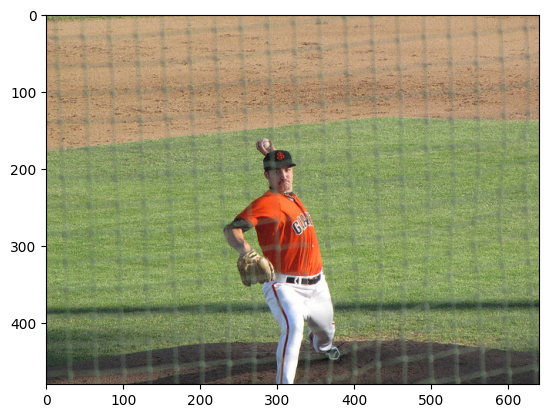

In [3]:
formated_image_id = str(mscoco_questions_train["questions"][0]["image_id"]).zfill(12)
image_path = f"/home/mou/Projects/DeepHallu/data/mscoco/train2014/COCO_train2014_{formated_image_id}.jpg"
print("image_path:", image_path)

image = Image.open(image_path)
plt.imshow(image)
plt.show()

In [4]:
mscoco_questions_train_df=pd.DataFrame(mscoco_questions_train["questions"])

In [5]:
rows = []
for ann in mscoco_annotations_train["annotations"]:
    base = {k: v for k, v in ann.items() if k != "answers"}
    for ans in ann["answers"]:
        row = base.copy()
        row.update({
            "answer": ans["answer"],
            "answer_confidence": ans.get("answer_confidence"),
            "answer_id": ans.get("answer_id"),
        })
        rows.append(row)
mscoco_annotations_train_df = pd.DataFrame(rows)

In [6]:
mscoco_questions_train_df.head(2)

,image_id,question,question_id
0,458752,What is this photo taken looking through?,458752000
1,458752,What position is this man playing?,458752001


In [7]:
mscoco_annotations_train_df.head(2)

,question_type,multiple_choice_answer,image_id,answer_type,question_id,answer,answer_confidence,answer_id
0,what is this,net,458752,other,458752000,net,maybe,1
1,what is this,net,458752,other,458752000,net,yes,2


In [8]:
merged_df = pd.merge(mscoco_questions_train_df, mscoco_annotations_train_df, on="question_id")
merged_df.head(2)

,image_id_x,question,question_id,question_type,multiple_choice_answer,image_id_y,answer_type,answer,answer_confidence,answer_id
0,458752,What is this photo taken looking through?,458752000,what is this,net,458752,other,net,maybe,1
1,458752,What is this photo taken looking through?,458752000,what is this,net,458752,other,net,yes,2


In [9]:
print("question_type: ")
for question_type in merged_df["question_type"].unique():
    print(question_type)

question_type: 
what is this
what
what color is the
is this
what is the person
what is in the
is the
is there
what is the
is
is the man
none of the above
does the
are the
was
how many
what color is
what is the man
what is on the
what is
how many people are in
is there a
is it
is the person
what does the
is this a
how
are there
has
could
where is the
are
are they
are these
why is the
how many people are
what color are the
what type of
where are the
what kind of
which
do
what is the name
is this an
what is the color of the
what color
what sport is
what are
what brand
what time
what are the
does this
is the woman
are there any
is that a
what animal is
why
do you
what is the woman
is this person
can you
is he
who is
what room is
what number is
